In [7]:
remotes::install_github("satijalab/seurat", "seurat5", quiet = TRUE)
remotes::install_github("mojaveazure/seurat-disk")
devtools::install_github('satijalab/seurat-data')

ERROR: Error: Failed to install 'unknown package' from GitHub:
  HTTP error 403.
  API rate limit exceeded for 134.58.253.20. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)

  Rate limit remaining: 0/60
  Rate limit reset at: 2023-10-23 10:27:56 UTC

  To increase your GitHub API rate limit
  - Use `usethis::create_github_token()` to create a Personal Access Token.
  - Use `usethis::edit_r_environ()` and add the token as `GITHUB_PAT`.


In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(Seurat)
library(remotes)
library(SeuratData)
library(SeuratDisk)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [3]:
data_path='/media/gambino/students_workdir/ibp/Fullgutcelldata_140k.h5seurat'
adata<-Connect(data_path)
adata

Validating h5Seurat file



Class: h5Seurat
Filename: /media/gambino/students_workdir/ibp/Fullgutcelldata_140k.h5seurat
Access type: H5F_ACC_RDONLY
Attributes: version, project, active.assay
Listing:
         name    obj_type dataset.dims dataset.type_class
 active.ident   H5I_GROUP         <NA>               <NA>
       assays   H5I_GROUP         <NA>               <NA>
   cell.names H5I_DATASET       142219         H5T_STRING
     commands   H5I_GROUP         <NA>               <NA>
       graphs   H5I_GROUP         <NA>               <NA>
       images   H5I_GROUP         <NA>               <NA>
    meta.data   H5I_GROUP         <NA>               <NA>
         misc   H5I_GROUP         <NA>               <NA>
    neighbors   H5I_GROUP         <NA>               <NA>
   reductions   H5I_GROUP         <NA>               <NA>
< Printed 10, out of 11>

In [14]:
Convert(data_path, to = "anndata", dest = './fullgut.h5ad')

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for harmony

Adding feature loadings for harmony

Adding dimensional reduction information for pca

Adding feature loadings for pca

Adding dimensional reduction information for umap

Adding RNA_snn as neighbors



In [3]:
dataObject<- LoadH5Seurat('/media/gambino/students_workdir/ibp/Fullgutcelldata_140k.h5seurat')

Validating h5Seurat file



Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding variable feature information for RNA

Adding miscellaneous information for RNA

Adding reduction harmony

Adding cell embeddings for harmony

Adding feature loadings for harmony

Adding projected loadings for harmony

Adding miscellaneous information for harmony

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding graph RNA_nn

Adding graph RNA_snn

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [4]:
Assays(dataObject)

[1] "RNA"

In [5]:
DefaultAssay(dataObject) <- "RNA"

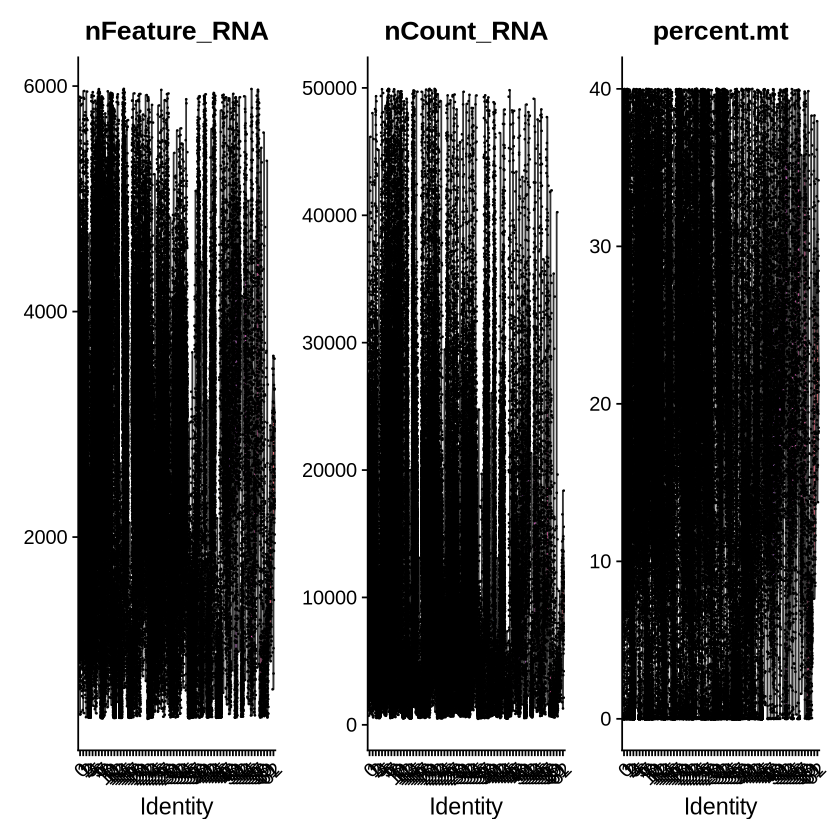

In [6]:
VlnPlot(dataObject, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


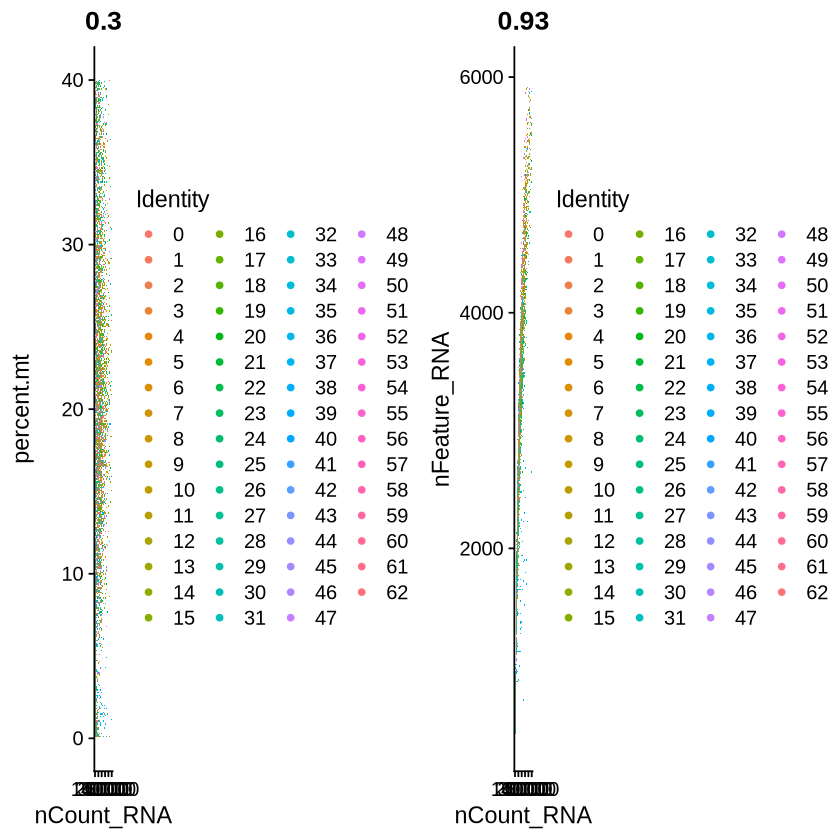

In [7]:
plot1 <- FeatureScatter(dataObject, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(dataObject, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



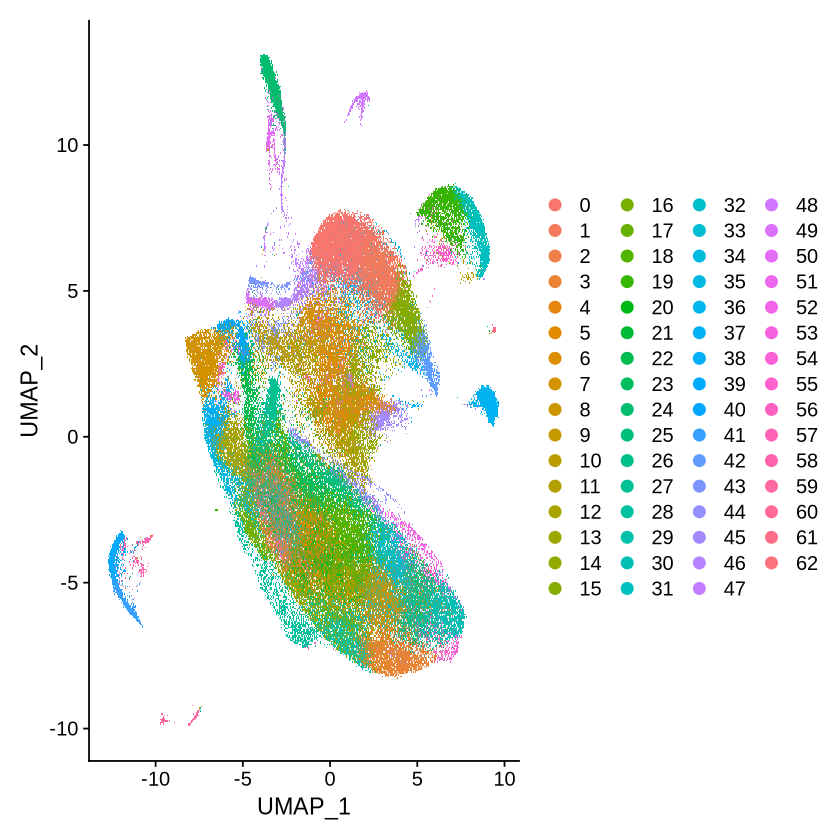

In [8]:
DimPlot(dataObject, reduction = "umap")

In [9]:
table(Idents(dataObject))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
9613 6525 4598 4302 4197 4167 4129 3672 3664 3394 3361 3287 3278 3146 3143 3114 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
3091 3066 2912 2858 2851 2793 2755 2729 2690 2557 2541 2487 2482 2442 2438 2310 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
2234 2098 2064 1962 1879 1788 1619 1473 1440 1355 1301 1245 1165 1046 1028  930 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62 
 756  729  702  627  591  527  518  478  383  376  376  359  278  175  125 

In [12]:
dataObject[["old.ident"]]<-Idents(object=dataObject)

In [14]:
head(dataObject@meta.data,5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,RNA_snn_res.0.4,RNA_snn_res.0.5,⋯,RNA_snn_res.3,anno_celltype_general,anno_celltype_cluster,Age_group,Pain_score,Sex,Diaorrhea,Constipation,Tissue,cluster_celltype
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,⋯,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GC1001745_E11_AAACCCAAGAAGAACG-1,GC1001745_E11,29760.3909,4793,22.70237,0.103468918,0.43326993,G2M,7,4,6,⋯,7,TA,11#TA,age31_to_40,none,Male,No,No,Colon,TA
GC1001745_E11_AAACCCAAGTACTCGT-1,GC1001745_E11,594.9349,421,1.12182,0.021516624,0.04457825,G2M,13,10,3,⋯,13,Co-pro,15#Co-pro,age31_to_40,none,Male,No,No,Colon,Co-pro
GC1001745_E11_AAACCCACAATAGAGT-1,GC1001745_E11,25185.3763,4202,22.94790,-0.106184995,-0.04618548,G1,17,1,0,⋯,17,Co-pro,0#Co-pro,age31_to_40,none,Male,No,No,Colon,Co-pro
GC1001745_E11_AAACGAACAACCGGAA-1,GC1001745_E11,12452.3396,2346,32.10447,-0.009095451,-0.06111201,G1,17,12,13,⋯,17,SC,16#SC,age31_to_40,none,Male,No,No,Colon,SC
GC1001745_E11_AAACGAAGTACCTGTA-1,GC1001745_E11,45579.2904,5552,33.30178,0.029382740,0.61875262,G2M,7,4,6,⋯,7,TA,11#TA,age31_to_40,none,Male,No,No,Colon,TA


In [24]:
levels(factor(dataObject@meta.data$orig.ident))

[1] "GC1001745_E11"      "GC1001746_F11"      "GC107955_A1"       
 [4] "GC107975_B1"        "GC108010_G1"        "GC108011_H1"       
 [7] "GC108673_SI-GA-B5"  "GC110188_SI-GA-C8"  "GC110189_SI-GA-D8" 
[10] "GC110308_SI-GA-B9"  "GC110526_SI-GA-D10" "GC110527_SI-GA-E10"
[13] "GC111001_SI-GA-E6"  "GC111002_SI-GA-F6"  "GC111886_SI-GA-C5" 
[16] "GC111887_SI-GA-D5"  "GC112070_SI-GA-C6"  "GC112071_SI-GA-D6" 
[19] "GC112519_SI-GA-H7"  "GC112520_SI-GA-A8"

In [25]:
colnames(dataObject@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "percent.mt"            "S.Score"               "G2M.Score"            
 [7] "Phase"                 "old.ident"             "RNA_snn_res.0.4"      
[10] "RNA_snn_res.0.5"       "RNA_snn_res.0.6"       "RNA_snn_res.0.7"      
[13] "RNA_snn_res.0.8"       "RNA_snn_res.0.9"       "RNA_snn_res.1"        
[16] "RNA_snn_res.1.1"       "RNA_snn_res.1.2"       "RNA_snn_res.1.3"      
[19] "RNA_snn_res.1.4"       "seurat_clusters"       "PIN"                  
[22] "Status"                "Subtype"               "RNA_snn_res.1.5"      
[25] "RNA_snn_res.1.6"       "RNA_snn_res.3"         "anno_celltype_general"
[28] "anno_celltype_cluster" "Age_group"             "Pain_score"           
[31] "Sex"                   "Diaorrhea"             "Constipation"         
[34] "Tissue"                "cluster_celltype"

In [30]:
Idents(object=dataObject)<- dataObject@meta.data$cluster_celltype

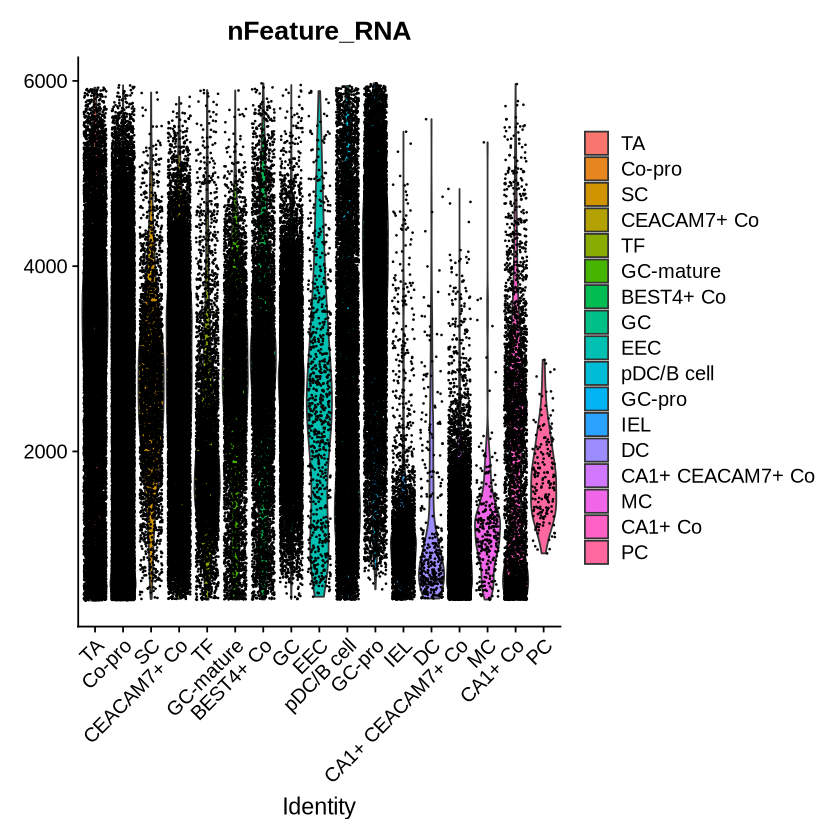

In [31]:
VlnPlot(dataObject, features = c("nFeature_RNA"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



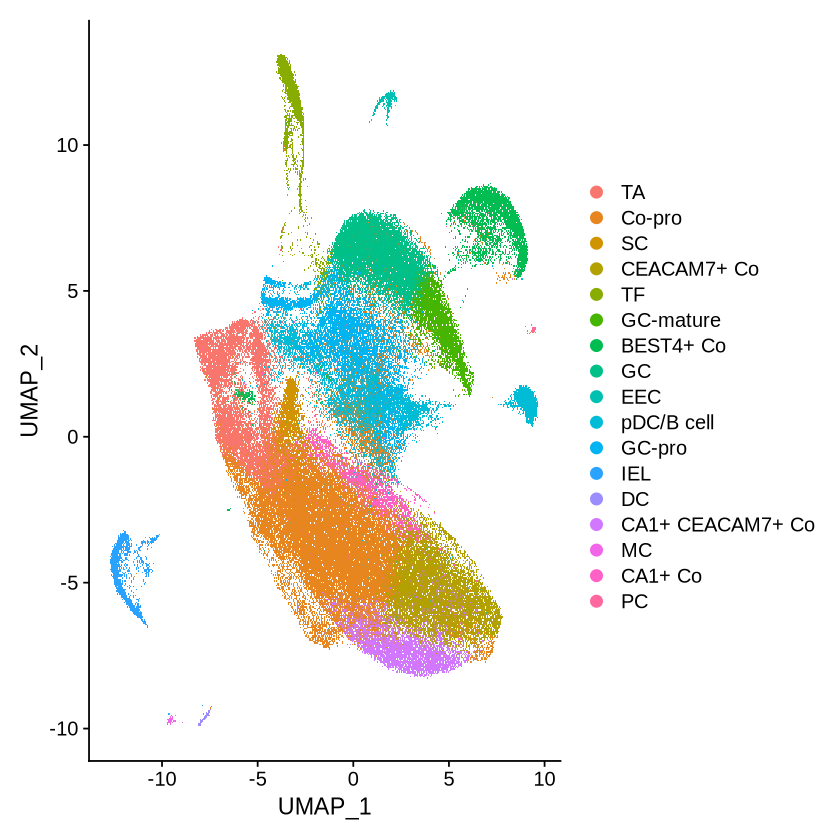

In [32]:
DimPlot(dataObject, reduction = "umap")